<a href="https://colab.research.google.com/github/CS129-18-A-2019-2020/Applied-Deep-Learning-Resources/blob/master/Multi_Layer_Perceptron_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd
import seaborn as sb
from tensorflow import keras
from sklearn import model_selection, metrics, impute, preprocessing, linear_model

# Set random seed
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

Populating the interactive namespace from numpy and matplotlib


### Import the MNIST Dataset

In [0]:
df_train = pd.read_csv('sample_data/mnist_train_small.csv', names=['label'] + list(range(0, 784)), header=None)
df_test = pd.read_csv('sample_data/mnist_test.csv', names=['label'] + list(range(0, 784)), header=None)

In [3]:
df_train.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


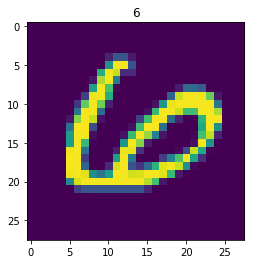

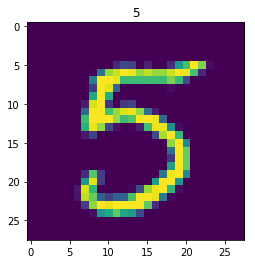

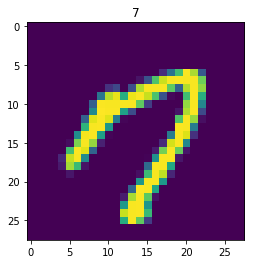

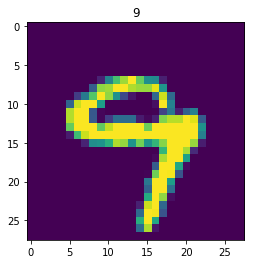

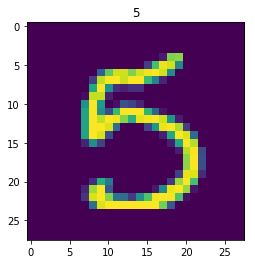

In [5]:
for i in range(5):
  plt.imshow(df_train.drop('label', axis=1).values[i].reshape(28, 28))
  plt.title(df_train['label'][i])
  plt.show()

### Data Preprocessing and Train-Test-Split

Neural networks have a difficult time with non-processed values. 

Generally, you'd want to scale values from 0 to 1, just because these kinds of models don't work well with multiple ranges of values of the input features.

__Note__: MinMax scaling is __outlier__ sensitive, meaning that if you do not clean or "clip" your outliers, the MinMax scaler would be distorted.


In [0]:
X_columns = df_train.drop('label', axis=1).columns
y_column = 'label'

#### Scaling and Cleaning our (training) data.

In [0]:
# Normalizing the training data

minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit_transform(df_train[0].values.reshape(-1, 1))

for col in X_columns:
  df_train[col] = minmax_scaler.transform(df_train[col].values.reshape(-1, 1))
  df_test[col] = minmax_scaler.transform(df_test[col].values.reshape(-1, 1))

In [8]:
df_train.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


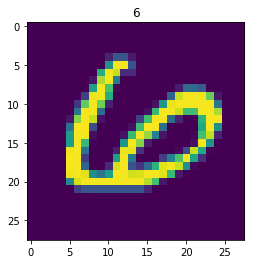

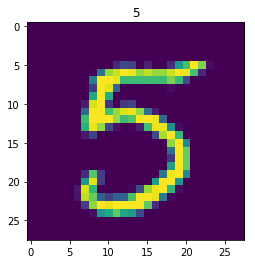

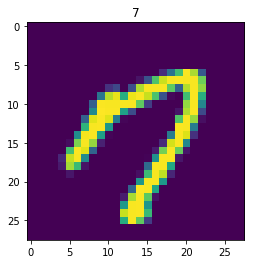

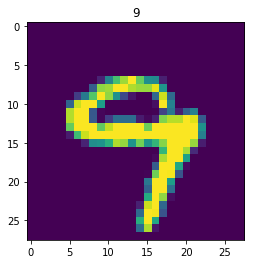

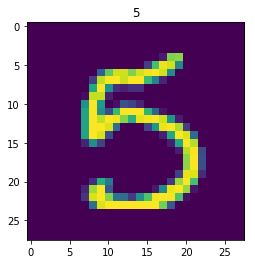

In [9]:
for i in range(5):
  plt.imshow(df_train.drop('label', axis=1).values[i].reshape(28, 28))
  plt.title(df_train['label'][i])
  plt.show()

### Modeling with the Multi-Layer Perceptron

In [10]:
# We set the input node to have the exact number of our features
inputs = keras.Input(
    shape=(
        len(X_columns),
        )
    )

# Define the hidden layers
outputs = keras.layers.Dense(128, activation='relu')(inputs)
outputs = keras.layers.Dense(64, activation='relu')(outputs)
outputs = keras.layers.Dense(32, activation='relu')(outputs)
outputs = keras.layers.Dense(16, activation='relu')(outputs)

# Define the output layer that only has 10 units, with one perceptron per label and has the softmax as the activation function
outputs = keras.layers.Dense(10, activation='softmax')(outputs)

# Define the final model
model = keras.Model(inputs=inputs, outputs=outputs, name='mlp_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


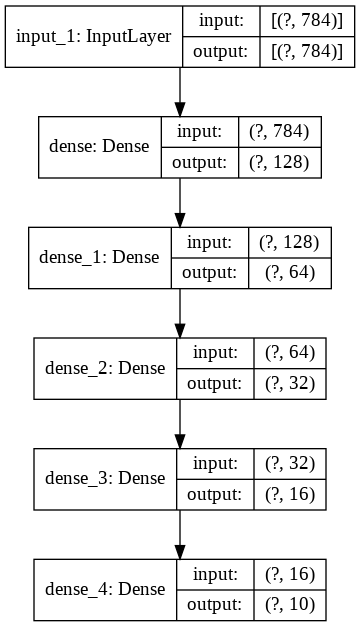

In [11]:
keras.utils.plot_model(model, 'my_first_perceptron.png', show_shapes=True)

In [0]:
# Define model hyperparameters for training the perceptron
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [13]:
# Use EarlyStopping to prevent possible overfitting
history = model.fit(df_train[X_columns].values, df_train[y_column],
                    batch_size=1000,
                    epochs=10000,
                    validation_split=0.2, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)]) 

Train on 16000 samples, validate on 4000 samples
Epoch 1/10000
16000/16000 [==============================] - 1s 61us/sample - loss: 13.7535 - acc: 0.2442 - val_loss: 2.3896 - val_acc: 0.3327
Epoch 2/10000
16000/16000 [==============================] - 1s 51us/sample - loss: 1.9590 - acc: 0.4055 - val_loss: 1.6653 - val_acc: 0.4827
Epoch 3/10000
16000/16000 [==============================] - 1s 51us/sample - loss: 1.4973 - acc: 0.5483 - val_loss: 1.2753 - val_acc: 0.6187
Epoch 4/10000
16000/16000 [==============================] - 1s 51us/sample - loss: 1.2442 - acc: 0.6343 - val_loss: 1.1418 - val_acc: 0.6697
Epoch 5/10000
16000/16000 [==============================] - 1s 52us/sample - loss: 1.1954 - acc: 0.6628 - val_loss: 1.1122 - val_acc: 0.6940
Epoch 6/10000
16000/16000 [==============================] - 1s 51us/sample - loss: 0.9426 - acc: 0.7287 - val_loss: 0.9840 - val_acc: 0.7050
Epoch 7/10000
16000/16000 [==============================] - 1s 51us/sample - loss: 0.8556 - acc: 

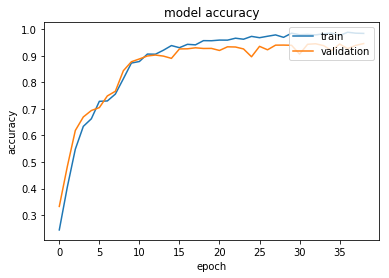

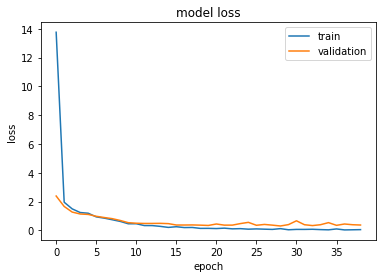

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Multi-layer Perceptron performance on the Test set

In [0]:
# Process the Test set
y_preds = model.predict(df_test[X_columns])
y_preds = np.argmax(y_preds, axis=1)

In [16]:
print(metrics.classification_report(
    df_test[y_column], y_preds, digits=4
))

              precision    recall  f1-score   support

           0     0.9669    0.9847    0.9757       980
           1     0.9798    0.9815    0.9806      1135
           2     0.9212    0.9516    0.9361      1032
           3     0.9345    0.9317    0.9331      1010
           4     0.9278    0.9552    0.9413       982
           5     0.9192    0.9439    0.9314       892
           6     0.9582    0.9562    0.9572       958
           7     0.9805    0.9270    0.9530      1028
           8     0.9523    0.9220    0.9369       974
           9     0.9286    0.9148    0.9216      1009

    accuracy                         0.9472     10000
   macro avg     0.9469    0.9469    0.9467     10000
weighted avg     0.9475    0.9472    0.9472     10000



### Comparison with Logistic Regression

In [17]:
logit_model = linear_model.LogisticRegression(solver='saga', n_jobs=-1)
logit_model.fit(df_train[X_columns], df_train[y_column])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print(metrics.classification_report(
    df_test[y_column], logit_model.predict(df_test[X_columns]), digits=4
))

              precision    recall  f1-score   support

           0     0.9502    0.9745    0.9622       980
           1     0.9610    0.9762    0.9685      1135
           2     0.9195    0.8740    0.8962      1032
           3     0.8890    0.9040    0.8964      1010
           4     0.9154    0.9145    0.9149       982
           5     0.9070    0.8419    0.8733       892
           6     0.9258    0.9509    0.9382       958
           7     0.9267    0.9105    0.9185      1028
           8     0.8389    0.8717    0.8550       974
           9     0.8852    0.8940    0.8895      1009

    accuracy                         0.9125     10000
   macro avg     0.9119    0.9112    0.9113     10000
weighted avg     0.9127    0.9125    0.9123     10000

